# Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.ensemble

/home/ggomarr/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 2 - Regression/Section 9 - Random Forest Regression/'

In [3]:
df=pd.read_csv(work_dir+'Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


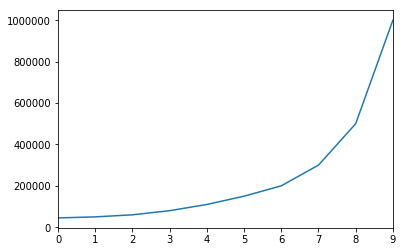

In [4]:
df['Salary'].plot()

In [5]:
X=df.as_matrix(['Level'])
Y=df['Salary'].values
X,Y

(array([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]]),
 array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
         300000,  500000, 1000000]))

# Clean up missing data

In [6]:
sum(np.isnan(X)),sum(np.isnan(Y))

(array([0]), 0)

In [9]:
# imputer=sklearn.preprocessing.Imputer(missing_values='NaN',strategy='mean',axis=0).fit(X[:,1:3])
# X[:,1:3]=imputer.transform(X[:,1:3])
# X

# Create dummy variables

In [16]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(X[:,3])
# X[:,3]=label_encoder.transform(X[:,3])
# one_hot_encoder=sklearn.preprocessing.OneHotEncoder(categorical_features=[3]).fit(X)
# X=one_hot_encoder.transform(X).toarray()
# X

# Avoid the dummy variable trap

In [18]:
# X=X=np.delete(X,0,1)
# X

# Create categorical labels

In [11]:
# label_encoder=sklearn.preprocessing.LabelEncoder().fit(Y)
# Y=label_encoder.transform(Y)
# Y

# Feature scaling

In [16]:
# X_scaler,Y_scaler=sklearn.preprocessing.StandardScaler().fit(X),sklearn.preprocessing.StandardScaler().fit(Y)
# X_scaled,Y_scaled=X_scaler.transform(X),Y_scaler.transform(Y)
# X_scaled,Y_scaled

# Train/test split

In [36]:
# X_train,X_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X,Y,test_size=0,random_state=0)
# Y_train.size,Y_test.size

In [37]:
# X_train,Y_train

In [38]:
# X_test,Y_test

# Regression - sklearn.ensemble.RandomForestRegressor()

In [7]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta).reshape((num,1)))

## 10 trees

In [25]:
%time rf_reg=sklearn.ensemble.RandomForestRegressor(n_estimators=10,random_state=0).fit(X,Y)
rf_reg.score(X,Y)

CPU times: user 16 ms, sys: 0 ns, total: 16 ms
Wall time: 18.1 ms


0.97044342303865816

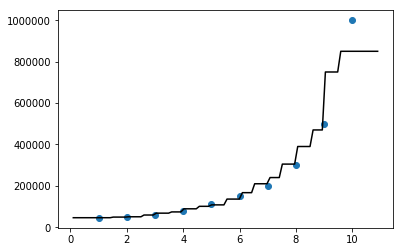

In [26]:
plt.scatter(X,Y)
X_plot=range_plot_X(X)
plt.plot(X_plot,rf_reg.predict(X_plot),color='black')

In [27]:
rf_reg.predict(6.5)

array([ 167000.])

## 100 trees

In [28]:
%time rf_reg=sklearn.ensemble.RandomForestRegressor(n_estimators=100,random_state=0).fit(X,Y)
rf_reg.score(X,Y)

CPU times: user 140 ms, sys: 0 ns, total: 140 ms
Wall time: 143 ms


0.93783933314530654

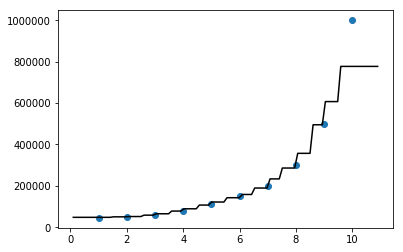

In [29]:
plt.scatter(X,Y)
X_plot=range_plot_X(X)
plt.plot(X_plot,rf_reg.predict(X_plot),color='black')

In [30]:
rf_reg.predict(6.5)

array([ 158300.])

## 500 trees

In [31]:
%time rf_reg=sklearn.ensemble.RandomForestRegressor(n_estimators=500,random_state=0).fit(X,Y)
rf_reg.score(X,Y)

CPU times: user 568 ms, sys: 0 ns, total: 568 ms
Wall time: 570 ms


0.94797037523748717

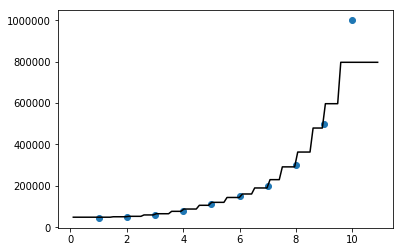

In [32]:
plt.scatter(X,Y)
X_plot=range_plot_X(X)
plt.plot(X_plot,rf_reg.predict(X_plot),color='black')

In [33]:
rf_reg.predict(6.5)

array([ 160600.])

## 1000 trees

In [34]:
%time rf_reg=sklearn.ensemble.RandomForestRegressor(n_estimators=1000,random_state=0).fit(X,Y)
rf_reg.score(X,Y)

CPU times: user 1.09 s, sys: 0 ns, total: 1.09 s
Wall time: 1.09 s


0.94841979885262317

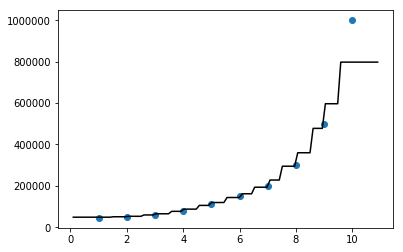

In [35]:
plt.scatter(X,Y)
X_plot=range_plot_X(X)
plt.plot(X_plot,rf_reg.predict(X_plot),color='black')

In [36]:
rf_reg.predict(6.5)

array([ 161600.])